# Data Description

You can get data from WHO : https://data.who.int/dashboards/covid19/data

| Field name | Type | Description |
| --- | --- | --- |
| Date_reported | Date | Date of reporting to WHO |
| Country_code | String | ISO Alpha-2 country code |
| Country | String | Country, territory, area |
| WHO_region | String | WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO). |
| New_cases | Integer | New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.* |
| Cumulative_cases | Integer | Cumulative confirmed cases reported to WHO to date. |
| New_deaths | Integer | New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.* |
| Cumulative_deaths | Integer | Cumulative confirmed deaths reported to WHO to date. |

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Exploring the Data

In [2]:
df = pd.read_csv('https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-daily-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489360 entries, 0 to 489359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      489360 non-null  object 
 1   Country_code       487321 non-null  object 
 2   Country            489360 non-null  object 
 3   WHO_region         489360 non-null  object 
 4   New_cases          210338 non-null  float64
 5   Cumulative_cases   489360 non-null  int64  
 6   New_deaths         153975 non-null  float64
 7   Cumulative_deaths  489360 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 29.9+ MB


In [4]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.103380e+05,4.893600e+05,153975.000000,4.893600e+05
mean,3.701063e+03,2.044598e+06,46.109537,2.167556e+04
std,4.856463e+04,8.522921e+06,242.358188,8.681120e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,6.602000e+03,0.000000,4.000000e+01
50%,6.100000e+01,5.950200e+04,2.000000,6.900000e+02
75%,6.770000e+02,6.609370e+05,15.000000,7.942000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.226130e+06


In [5]:
# change float format in description
pd.options.display.float_format = '{:,.1f}'.format
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,"210,338.0","489,360.0","153,975.0","489,360.0"
mean,"3,701.1","2,044,598.3",46.1,"21,675.6"
std,"48,564.6","8,522,920.7",242.4,"86,811.2"
min,"-65,079.0",0.0,"-3,520.0",0.0
25%,3.0,"6,602.0",0.0,40.0
50%,61.0,"59,502.0",2.0,690.0
75%,677.0,"660,937.0",15.0,"7,942.0"
max,"6,966,046.0","103,436,829.0","44,047.0","1,226,130.0"


In [6]:
df.describe(include='object')

,Date_reported,Country_code,Country,WHO_region
count,489360,487321,489360,489360
unique,2039,239,240,7
top,2025-08-03,AI,Anguilla,EUR
freq,240,2039,2039,126418


# Duplicate Values

In [7]:
df.duplicated().sum()

np.int64(0)

# Missing Values

In [8]:
df.isnull().sum()

,0
Date_reported,0
Country_code,2039
Country,0
WHO_region,0
New_cases,279022
Cumulative_cases,0
New_deaths,335385
Cumulative_deaths,0


In [9]:
round(df.isna().mean() * 100 ,2)

,0
Date_reported,0.0
Country_code,0.4
Country,0.0
WHO_region,0.0
New_cases,57.0
Cumulative_cases,0.0
New_deaths,68.5
Cumulative_deaths,0.0


In [10]:
df[(df.Country == 'Egypt') & (df.Date_reported.between('2022-03-01', '2022-04-01'))]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
189041,2022-03-01,EG,Egypt,EMR,"1,523.0",483771,34.0,24074
189189,2022-03-02,EG,Egypt,EMR,"1,322.0",485093,36.0,24110
189523,2022-03-03,EG,Egypt,EMR,"1,288.0",486381,22.0,24132
189669,2022-03-04,EG,Egypt,EMR,"1,261.0",487642,17.0,24149
190001,2022-03-05,EG,Egypt,EMR,"1,121.0",488763,13.0,24162
190148,2022-03-06,EG,Egypt,EMR,"1,113.0",489876,10.0,24172
190481,2022-03-07,EG,Egypt,EMR,"1,093.0",490969,25.0,24197
190628,2022-03-08,EG,Egypt,EMR,923.0,491892,25.0,24222
190962,2022-03-09,EG,Egypt,EMR,882.0,492774,22.0,24244
191108,2022-03-10,EG,Egypt,EMR,884.0,493658,13.0,24257


In [11]:
df.fillna(0, inplace=True)

In [12]:
df.isnull().sum()

,0
Date_reported,0
Country_code,0
Country,0
WHO_region,0
New_cases,0
Cumulative_cases,0
New_deaths,0
Cumulative_deaths,0


In [13]:
df.columns = df.columns.str.lower()

In [14]:
df.sample()

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
134356,2021-07-16,DK,Denmark,EUR,"1,141.0",305969,1.0,2540


# Date_reported

In [15]:
df.date_reported.dtype

dtype('O')

In [16]:
df.date_reported.describe()

,date_reported
count,489360
unique,2039
top,2025-08-03
freq,240


In [17]:
df.date_reported.min(), df.date_reported.max()

('2020-01-04', '2025-08-03')

In [18]:
# Not applicable
# df.date_reported.max() - df.date_reported.min()

In [19]:
# Change date column to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%Y-%m-%d')

In [20]:
df['date_reported'].dtype

dtype('<M8[ns]')

In [21]:
df['date_reported'].dtype.type

numpy.datetime64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489360 entries, 0 to 489359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_reported      489360 non-null  datetime64[ns]
 1   country_code       489360 non-null  object        
 2   country            489360 non-null  object        
 3   who_region         489360 non-null  object        
 4   new_cases          489360 non-null  float64       
 5   cumulative_cases   489360 non-null  int64         
 6   new_deaths         489360 non-null  float64       
 7   cumulative_deaths  489360 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 29.9+ MB


In [23]:
# Available now
df.date_reported.max() - df.date_reported.min()

Timedelta('2038 days 00:00:00')

In [24]:
total_period = df.date_reported.max() - df.date_reported.min()

# change to years, months, days
total_years = total_period/ np.timedelta64(365, 'D')         # could be  D, W, h, m, s
total_months = total_period/ np.timedelta64(30, 'D')
total_days = total_period/ np.timedelta64(1, 'D')

print(f'Total period: {total_period}')
print(f'Total years: {total_years:.2f}')
print(f'Total months: {total_months:.2f}')
print(f'Total days: {total_days}')

Total period: 2038 days 00:00:00
Total years: 5.58
Total months: 67.93
Total days: 2038.0


In [25]:
from dateutil.relativedelta import relativedelta

relativedelta(df.date_reported.max(), df.date_reported.min())

relativedelta(years=+5, months=+6, days=+30)

In [26]:
from datetime import datetime

# Get the current date
current_date = datetime.now()    # can specify time zone
current_date

datetime.datetime(2025, 8, 22, 19, 17, 34, 56594)

In [27]:
current_date = datetime.today()
current_date

datetime.datetime(2025, 8, 22, 19, 17, 34, 63375)

In [28]:
relativedelta(df.date_reported.max(), current_date)

relativedelta(days=-19, hours=-19, minutes=-17, seconds=-35, microseconds=+936625)

In [29]:
relativedelta(current_date, df.date_reported.max())

relativedelta(days=+19, hours=+19, minutes=+17, seconds=+34, microseconds=+63375)

# Country_code and Country

In [30]:
df.country_code.nunique(), df.country.nunique()

(240, 240)

In [31]:
df.drop('country_code', axis =1, inplace=True)

In [32]:
df.country.unique()

array(['Anguilla', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Brazil',
       'Canada', 'Colombia', 'Comoros', 'Cook Islands', 'Cura�ao',
       'Dominica', 'Dominican Republic', 'Falkland Islands (Malvinas)',
       'Gabon', 'Guadeloupe', 'India', 'Iran (Islamic Republic of)',
       'Ireland', 'Isle of Man', 'Jordan', 'Lesotho', 'Malawi', 'Nauru',
       'Qatar', 'Romania', 'Rwanda', 'Saint Vincent and the Grenadines',
       'Senegal', 'Solomon Islands', 'Sri Lanka', 'Syrian Arab Republic',
       'Tajikistan', 'Thailand', 'United Arab Emirates',
       'United Republic of Tanzania',
       'Venezuela (Bolivarian Republic of)', 'Seychelles',
       'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste',
       'Tuvalu', 'United States of America', 'Austria', 'Belgium',
       'Bermuda', 'Burkina Faso', 'Burundi', 'Cambodia', 'Chad',
       'Denmark', 'French Guiana', 'Grenada', 'Japan', 'Jersey', 'Monaco',
       'New Zealand', 'Nigeria', 'Peru', 'Russian Federation',
       'Saint

In [33]:
'Egypt' in df.country.unique()

True

# Filter by Country

In [34]:
df[df.country == 'Egypt'].shape

(2039, 7)

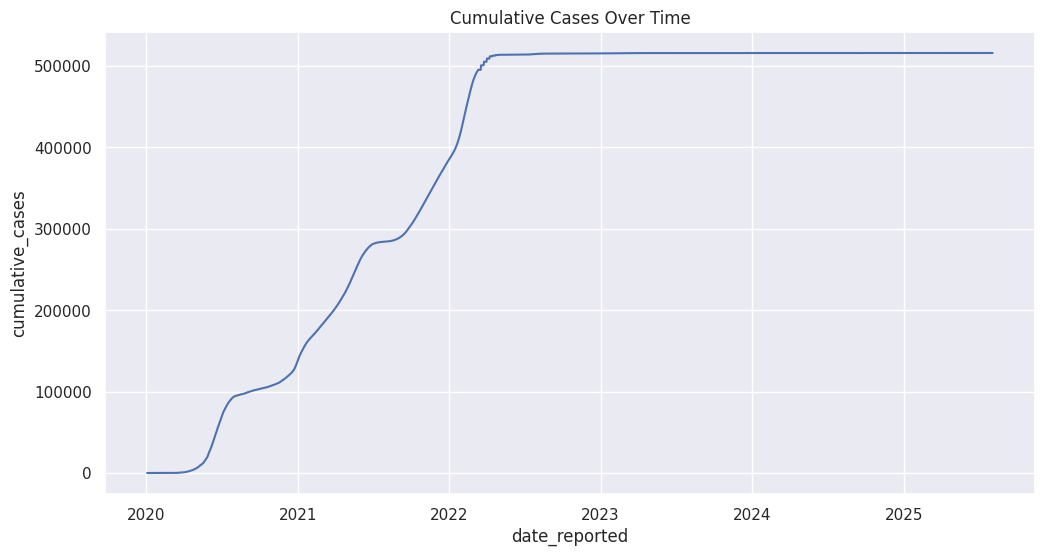

In [35]:
# plot cumulative cases over time
plt.figure(figsize=(12,6))
sns.lineplot(x='date_reported', y='cumulative_cases', data=df[df.country == 'Egypt'])
plt.title('Cumulative Cases Over Time')
plt.show()

In [36]:
# plotly express
px.line(df[df.country == 'Egypt'], x='date_reported', y='cumulative_cases')

In [37]:
px.line(df[df.country == 'Egypt'], x='date_reported', y='cumulative_cases',
         title='Cumulative Cases Over Time', width=800, height=400)

In [38]:
# Function to plot line plot for a country
def cumulative_cases(country):
    fig = px.line(df[df.country == country], x='date_reported', y='cumulative_cases',
                    title= f'Cumulative Cases Over Time for {country}', width=800, height=400)
    fig.show()

In [39]:
cumulative_cases('Egypt')

In [40]:
cumulative_cases('United States of America')

In [41]:
def cumulative_deaths(country):
    fig = px.line(df[df.country == country], x='date_reported', y='cumulative_deaths',
                     title= f'Cumulative Cases Over Time for {country}', width=800, height=400)
    fig.show()

In [42]:
cumulative_deaths('Egypt')

In [43]:
cumulative_deaths('United States of America')

In [44]:
# Cumulative cases for a specific country over specific period
def cumulative_cases_period(country, start_date, end_date):
    data = df[(df.country == country) & (df.date_reported.between(start_date, end_date))]
    fig = px.line(data, x='date_reported', y='cumulative_cases', title= f'Cumulative Cases for {country} from {start_date} to {end_date}', width=800, height=400)
    fig.show()

In [45]:
cumulative_cases_period('Egypt', '2020-03-01', '2020-05-01')

In [46]:
# Cumulative deaths for a specific country over specific period
def cumulative_deaths_period(country, start_date, end_date):
    data = df[(df.country == country) & (df.date_reported.between(start_date, end_date))]
    fig = px.line(data, x='date_reported', y='cumulative_deaths',
             title= f'Cumulative Deaths for {country} from {start_date} to {end_date}', width=800, height=400, markers=True)
    fig.show()

In [47]:
cumulative_deaths_period('Egypt', '2020-03-01', '2020-05-01')

# Filter by year

In [48]:
df['year'] = df.date_reported.dt.year
df['month'] = df.date_reported.dt.month

In [49]:
df.head()

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month
0,2020-01-04,Anguilla,AMR,0.0,0,0.0,0,2020,1
1,2020-01-04,Azerbaijan,EUR,0.0,0,0.0,0,2020,1
2,2020-01-04,Bangladesh,SEAR,0.0,0,0.0,0,2020,1
3,2020-01-04,Barbados,AMR,0.0,0,0.0,0,2020,1
4,2020-01-04,Brazil,AMR,0.0,0,0.0,0,2020,1


<Axes: xlabel='month', ylabel='new_cases'>

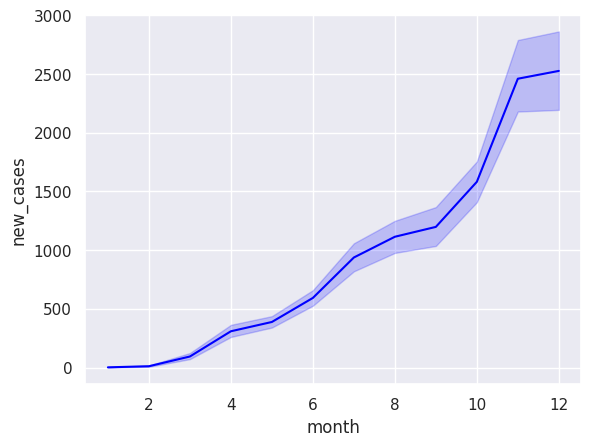

In [50]:
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2020], color='blue')

Text(0.5, 1.0, 'New Cases Over Time')

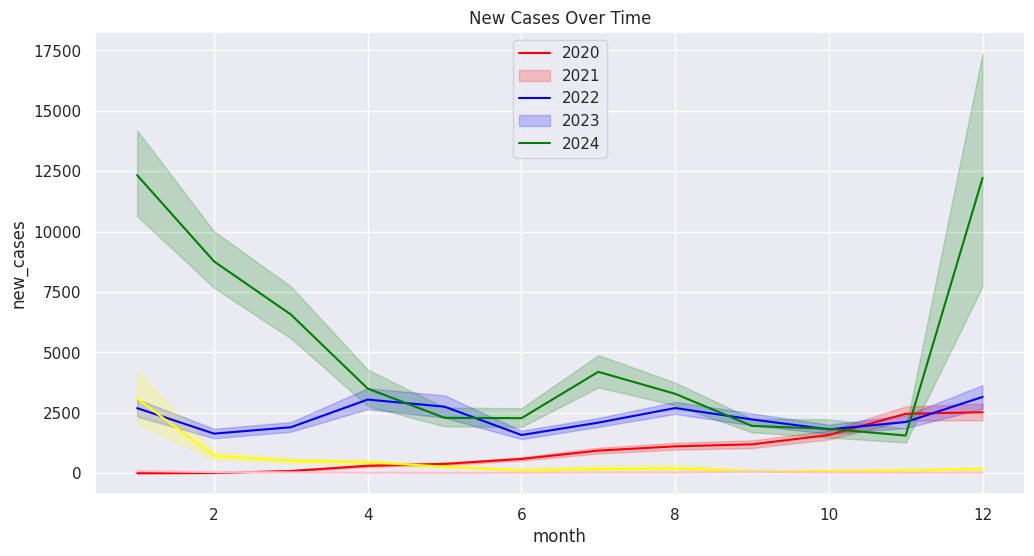

In [51]:
# Plot cumulative cases for each year
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2020], color='red')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2021], color='blue')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2022], color='green')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2023], color='yellow')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2024], color='pink')

plt.legend(['2020', '2021', '2022', '2023', '2024'])
plt.title('New Cases Over Time')

<Axes: xlabel='month', ylabel='new_cases'>

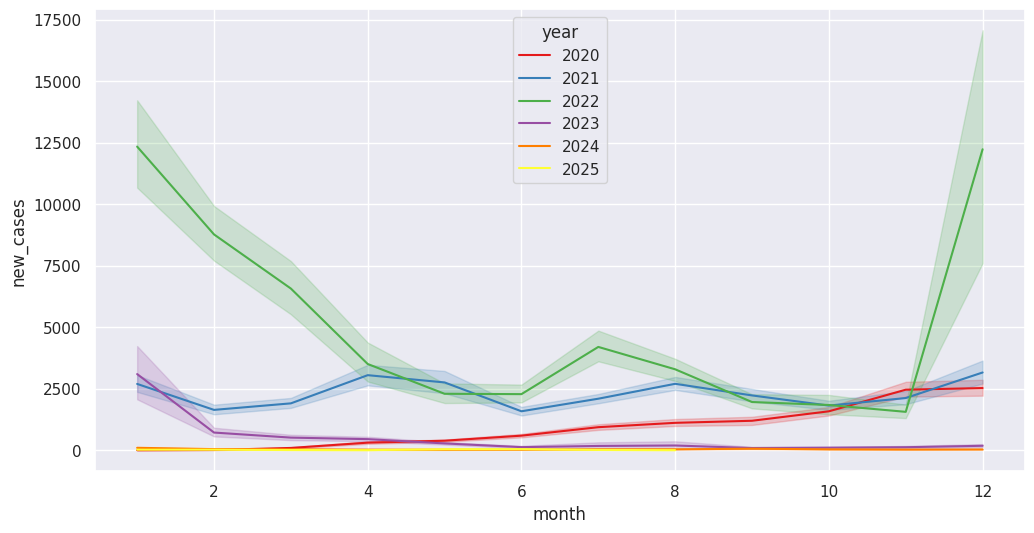

In [52]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', hue ='year', data=df, palette='Set1')

# Total Cases

In [53]:
df[df.year==2022].groupby('month')['new_cases'].mean()

,new_cases
month,
1,"12,337.2"
2,"8,769.6"
3,"6,570.1"
4,"3,503.9"
5,"2,294.5"
6,"2,280.1"
7,"4,198.4"
8,"3,289.1"
9,"1,958.9"


In [54]:
df.groupby('year')['new_cases'].sum()

,new_cases
year,
2020,"82,335,574.0"
2021,"203,111,242.0"
2022,"444,029,532.0"
2023,"44,321,756.0"
2024,"3,558,487.0"
2025,"1,117,626.0"


In [55]:
df[df['country']=='Egypt'].groupby('year')['new_deaths'].sum()

,new_deaths
year,
2020,"7,576.0"
2021,"14,151.0"
2022,"3,075.0"
2023,28.0
2024,0.0
2025,0.0


<Axes: xlabel='month', ylabel='new_cases'>

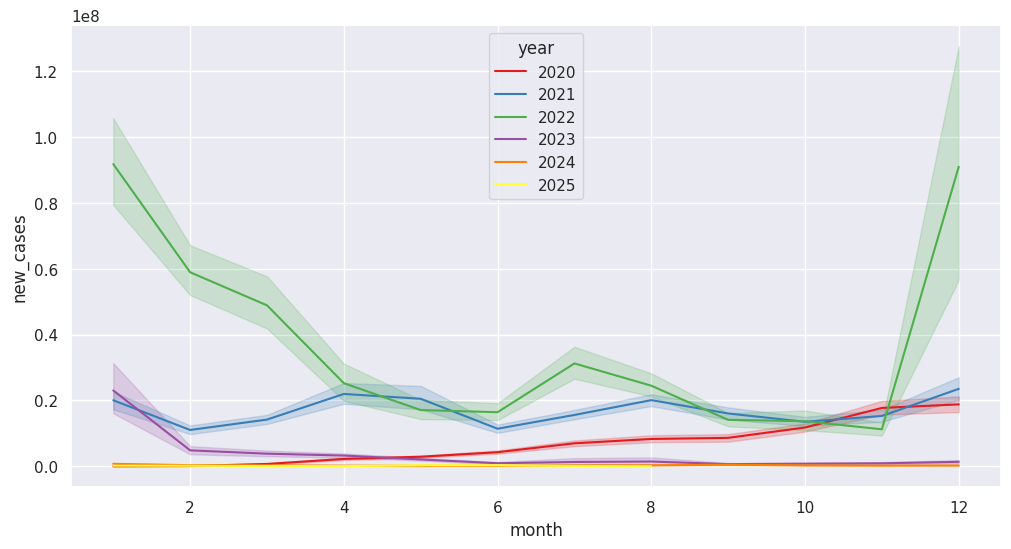

In [56]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', hue ='year', data=df, palette='Set1', estimator=np.sum)

In [57]:
df['month_year'] = df.date_reported.dt.to_period('M').astype(str)
df.sample(5)

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
307933,2023-07-10,Iceland,EUR,0.0,208751,0.0,186,2023,7,2023-07
48703,2020-07-24,Belize,AMR,0.0,43,0.0,2,2020,7,2020-07
413062,2024-09-20,Australia,WPR,0.0,11861161,0.0,25236,2024,9,2024-09
48744,2020-07-25,Angola,AFR,29.0,880,2.0,35,2020,7,2020-07
62653,2020-09-21,Iceland,EUR,0.0,2393,0.0,10,2020,9,2020-09


In [58]:
px.bar(df, x='month_year', y='new_cases', title='New Cases Over Time')

Output hidden; open in https://colab.research.google.com to view.

In [59]:
px.histogram(df, x='month_year', y='new_cases', color='year', title='New Cases Over Time')

Output hidden; open in https://colab.research.google.com to view.

In [60]:
def total_cases(country, start_date = df.date_reported.min(), end_date = df.date_reported.max()):
    data = df[df.country == country]
    fig = px.histogram(data, x='month_year', y='new_cases', color='year', title=f'Total Cases for {country}',
         width=800, height=400, range_x=[start_date, end_date], nbins=50)
    fig.show()

In [61]:
total_cases('Egypt')

In [62]:
total_cases('Egypt', '2020-03', '2021-03')

In [63]:
total_cases('Egypt', '2020-03-15', '2021-05-15')

# Filter by Region

In [64]:
df.who_region.unique()

array(['AMR', 'EUR', 'SEAR', 'AFR', 'WPR', 'EMR', 'OTHER'], dtype=object)

In [65]:
df[df.who_region == 'EMR'].country.unique()            # WHO Regional Office for the Eastern Mediterranean

array(['Iran (Islamic Republic of)', 'Jordan', 'Qatar',
       'Syrian Arab Republic', 'United Arab Emirates', 'Egypt', 'Libya',
       'Somalia', 'Afghanistan', 'Saudi Arabia', 'Bahrain', 'Iraq',
       'Lebanon', 'Oman', 'Djibouti', 'Kuwait', 'Morocco',
       'occupied Palestinian territory, including east Jerusalem',
       'Pakistan', 'Sudan', 'Tunisia', 'Yemen'], dtype=object)

In [66]:
def total_cases_region(region, start_date = df.date_reported.min(), end_date = df.date_reported.max()):
    data = df[df.who_region == region]
    fig = px.histogram(data, x='month_year', y='new_cases', color='year', title=f'Total Cases for {region}',
         width=800, height=400, range_x=[start_date, end_date])
    fig.show()

In [67]:
total_cases_region('EMR')

In [68]:
px.bar(df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False),
         title='Total Cases by WHO Region', width=800, height=400)

# Top Countries

In [69]:
data = df.groupby('country')['new_cases'].sum().sort_values(ascending=False)
px.bar(data, title='Total Cases by Country', width=1400, height=800)

In [70]:
data = df.groupby('country')['cumulative_cases'].max().sort_values(ascending=False)
px.bar(data, title='Cumulative Cases by Country', width=1400, height=800)

In [71]:
data = df[df['who_region'] == 'EMR'].groupby('country')['cumulative_cases'].max().sort_values(ascending=False)
px.bar(data, title='Cumulative Cases by Country in EMR Region', width=800, height=800)

In [72]:
data = df[df['who_region'] == 'EMR'].groupby('country')['cumulative_deaths'].max().sort_values(ascending=False)
fig = px.bar(data, title='Cumulative Deaths by Country in EMR Region', width=800, height=800)
fig.update(layout_showlegend=False)
fig.show()

In [73]:
df[df['new_cases'] < 0]

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
255,2020-01-05,Finland,EUR,-1.0,0,0.0,0,2020,1,2020-01
3352,2020-01-17,Thailand,SEAR,-3.0,2,0.0,0,2020,1,2020-01
4791,2020-01-23,Thailand,SEAR,-3.0,4,0.0,0,2020,1,2020-01
5313,2020-01-26,Thailand,SEAR,-3.0,5,0.0,0,2020,1,2020-01
5789,2020-01-28,Sri Lanka,SEAR,-4.0,1,0.0,0,2020,1,2020-01
7174,2020-02-02,India,SEAR,-3.0,2,0.0,0,2020,2,2020-02
8165,2020-02-07,Canada,AMR,-4.0,5,0.0,0,2020,2,2020-02
13935,2020-03-02,India,SEAR,-2.0,5,0.0,0,2020,3,2020-03
15475,2020-03-08,Maldives,SEAR,-4.0,2,0.0,0,2020,3,2020-03
15735,2020-03-09,Indonesia,WPR,-4.0,6,0.0,0,2020,3,2020-03


In [74]:
df[df['new_deaths'] < 0]

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
23035,2020-04-08,Sri Lanka,SEAR,6.0,186,-6.0,0,2020,4,2020-04
26589,2020-04-23,Guatemala,AMR,22.0,316,-1.0,8,2020,4,2020-04
27816,2020-04-28,Guadeloupe,AMR,0.0,149,-3.0,10,2020,4,2020-04
29082,2020-05-04,Guatemala,AMR,44.0,688,-1.0,17,2020,5,2020-05
56459,2020-08-26,R�union,AFR,48.0,1292,-4.0,2,2020,8,2020-08
57476,2020-08-30,Bahamas,AMR,37.0,2057,-10.0,40,2020,8,2020-08
71054,2020-10-26,Guadeloupe,AMR,0.0,7474,-1.0,126,2020,10,2020-10
77753,2020-11-22,Thailand,SEAR,11.0,3913,-60.0,0,2020,11,2020-11
89897,2021-01-12,Honduras,AMR,719.0,127945,-2.0,3273,2021,1,2021-01
101025,2021-02-27,Belize,AMR,9.0,12280,-1.0,314,2021,2,2021-02


* New Cases and New Deaths may be negative due to data correction as per WHO

In [75]:
df[df.new_cases == df.new_cases.max()]

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
260346,2022-12-23,China,WPR,"6,966,046.0",50447985,894.0,36318,2022,12,2022-12


In [76]:
df.query('new_cases == new_cases.max()')

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
260346,2022-12-23,China,WPR,"6,966,046.0",50447985,894.0,36318,2022,12,2022-12


In [77]:
max_new_cases = df[df.new_cases == df.new_cases.max()]
max_new_cases['country']

,country
260346,China


In [78]:
max_new_cases['country'].iloc[0]

'China'

In [79]:
max_new_cases['country'].values

array(['China'], dtype=object)

In [80]:
max_new_cases['country'].values[0]

'China'

In [81]:
print(f'The country with the most new cases is {max_new_cases["country"].iloc[0]} ')
print(f'The date with the most new cases is {max_new_cases["date_reported"].iloc[0]} ')

The country with the most new cases is China 
The date with the most new cases is 2022-12-23 00:00:00 


In [82]:
max_new_cases.date_reported.dt.day_name()

,date_reported
260346,Friday


In [83]:
max_new_cases.date_reported.dt.day_name().values[0]

'Friday'

In [84]:
# change date format
max_new_cases.date_reported.dt.strftime('%d-%m-%Y')

,date_reported
260346,23-12-2022


In [85]:
max_new_cases.date_reported.dt.strftime('%d-%m-%Y').iloc[0]

'23-12-2022'

In [86]:
max_new_cases.date_reported.iloc[0]

Timestamp('2022-12-23 00:00:00')

In [87]:
df.date_reported = df.date_reported.dt.strftime('%d-%m-%Y')

In [88]:
df.date_reported.dtype

dtype('O')

In [89]:
max_new_cases.date_reported.iloc[0]

Timestamp('2022-12-23 00:00:00')

In [90]:
max_new_cases = df[df.new_cases == df.new_cases.max()]
max_new_cases.date_reported.iloc[0]

'23-12-2022'

In [91]:
df.groupby('country')['new_cases'].max().nlargest(10)

,new_cases
country,
China,"6,966,046.0"
France,"2,417,043.0"
Germany,"1,588,891.0"
United States of America,"1,265,520.0"
Spain,"956,506.0"
Netherlands (Kingdom of the),"626,302.0"
Republic of Korea,"621,328.0"
Australia,"588,813.0"
Viet Nam,"454,212.0"


In [92]:
fig = px.bar(df.groupby('country')['new_cases'].max().nlargest(10), title='Top 10 Countries with the Most New Cases', width=800, height=600)
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Cases')
fig.show()

In [93]:
fig = px.bar(df.groupby('country')['new_deaths'].max().nlargest(10),
         title='Top 10 Countries with the Most New Deaths', width=800, height=600, orientation='h')
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Deaths')
fig.show()

In [94]:
fig = px.bar(df.groupby('country')['new_deaths'].max().nlargest(10).sort_values(ascending= True),
         title='Top 10 Countries with the Most New Deaths', width=800, height=600, orientation='h')
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Deaths')
fig.show()

In [95]:
def top10_countries(data, column):
    data = data.groupby('country')[column].max().nlargest(10)
    fig = px.bar(data, title=f'Top 10 Countries with the Most {column}', width=800, height=600)
    fig.update(layout_showlegend=False)
    fig.update_layout(xaxis_title='Country', yaxis_title=column)
    fig.show()

In [96]:
top10_countries(df, 'new_cases')

In [97]:
top10_countries(df, 'new_deaths')

In [98]:
top10_countries(df, 'cumulative_cases')

In [99]:
top10_countries(df, 'cumulative_deaths')

In [100]:
# 4 subplots in one figure plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [101]:
data = df.groupby('country').max()
data

,date_reported,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,month,month_year
country,,,,,,,,,
Afghanistan,31-12-2024,EMR,"3,243.0",235214,159.0,7998,2025,12,2025-08
Albania,31-12-2024,EUR,"2,832.0",337198,21.0,3608,2025,12,2025-08
Algeria,31-12-2024,AFR,"2,521.0",272370,49.0,6881,2025,12,2025-08
American Samoa,31-12-2024,WPR,955.0,8359,5.0,34,2025,12,2025-08
Andorra,31-12-2024,EUR,"1,676.0",48015,6.0,159,2025,12,2025-08
...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,31-12-2024,WPR,"2,654.0",3760,7.0,9,2025,12,2025-08
Yemen,31-12-2024,EMR,287.0,11945,60.0,2159,2025,12,2025-08
Zambia,31-12-2024,AFR,"5,555.0",349892,72.0,4078,2025,12,2025-08


In [102]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('New Cases', 'New Deaths', 'Cumulative Cases', 'Cumulative Deaths'))

fig.add_trace(go.Bar(x=data['new_cases'].nlargest(10).index, y=data['new_cases'].nlargest(10).values), row=1, col=1)
fig.add_trace(go.Bar(x=data['new_deaths'].nlargest(10).index, y=data['new_deaths'].nlargest(10).values), row=1, col=2)
fig.add_trace(go.Bar(x=data['cumulative_cases'].nlargest(10).index, y=data['cumulative_cases'].nlargest(10).values), row=2, col=1)
fig.add_trace(go.Bar(x=data['cumulative_deaths'].nlargest(10).index, y=data['cumulative_deaths'].nlargest(10).values), row=2, col=2)


fig.update(layout_showlegend=False)
fig.update_layout(height=900, width=1200, title_text='Top 10 Countries with the Most Cases and Deaths')
fig.show()

# Create Easy Maps

In [103]:
df_all_max = df.groupby('country').max()
df_2021_max = df[df.year == 2021].groupby('country').max()
df_2022_max = df[df.year == 2022].groupby('country').sum()

In [104]:
px.choropleth(df_all_max, locations=df_all_max.index, locationmode='country names', color=df_all_max['cumulative_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues

# More Sophisticated Maps

Implemented according to : https://medium.com/analytics-vidhya/hello-world-covid19-visualization-eb6736e1dec with some modifications

In [105]:
data = dict(type = 'choropleth',                    #  ‘choropleth’ specifies that we are plotting a choropleth map
           locations = df_2021_max.index,           # list of country names
            locationmode = 'country names',         # the plotting level is country wise. The value can be “ISO-3” , “USA-states” , “country names”
            z = df_2021_max['cumulative_cases'],    # The value or factor that is used to distinguish the countries. These values are used by the colour scale.
            text = df_2021_max.index,               # The textual information to be displayed for each country on hover.
            colorscale= 'agsunset',
            reversescale = False,
            marker = dict(line = dict(color='white',width=1)),
            colorbar = {'title':'cumulative_cases'})

Available color scales are:

> ‘Greys’, ‘YlGnBu’, ‘Greens’, ‘YlOrRd’, ‘Bluered’, ‘RdBu’, ‘Reds’, ‘Blues’, ‘Picnic’, ‘Rainbow’, ‘Portland’, ‘Jet’, ‘Hot’, ‘Blackbody’, ‘Earth’, ‘Electric’, ‘Viridis’, ‘Cividis’

In [106]:
layout = dict(title = 'World wide Cumulative Cases in 2021',
             geo = dict(showframe = False, projection = {'type':'mollweide'}))   # equirectangular

* Available projections :
> ‘equirectangular’, ‘mercator’, ‘orthographic’, ‘natural earth’, ‘kavrayskiy7’, ‘miller’, ‘robinson’, ‘eckert4’, ‘azimuthal equal area’, ‘azimuthal equidistant’, ‘conic equal area’, ‘conic conformal’, ‘conic equidistant’, ‘gnomonic’, ‘stereographic’, ‘mollweide’, ‘hammer’, ‘transverse mercator’, ‘albers usa’, ‘winkel tripel’, ‘aitoff’, ‘sinusoidal’.

In [107]:
go.Figure(data=[data],layout=layout)

In [108]:
def plot_map(data, column):
    data = dict(type = 'choropleth',
           locations = data.index,
            locationmode = 'country names',
            z = data[column],
            text = data.index,
            colorscale= 'agsunset',
            reversescale = False,
            marker = dict(line = dict(color='white',width=1)),
            colorbar = {'title': column } )

    layout = dict(title = f'World wide {column} covid19 cases',
             geo = dict(showframe = False, projection = {'type':'natural earth'}))

    choromap = go.Figure(data=[data],layout=layout)
    choromap.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, width=1000, height=600)
    return(choromap)

In [109]:
plot_map(df_2021_max, 'cumulative_cases')

In [110]:
plot_map(df_all_max, 'cumulative_cases')

In [111]:
plot_map(df_all_max, 'cumulative_deaths')

In [112]:
choromap = px.choropleth(df_2022_max, locations=df_2022_max.index, locationmode='country names', color=df_2022_max['new_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues

choromap.show()

* For reference : https://plotly.com/python/choropleth-maps/

# Tasks

## Task 1
Create a new column called 'season' that specify {'Winter', 'Spring', 'Summer', 'Autumn'}

### way 1

In [113]:
df['season'] = pd.cut(
    df['month'],
    bins=[0, 2, 5, 8, 11, 12],
    labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter'],
    ordered=False
)

### way 2

In [114]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

### way 3

In [115]:
df['season'] = df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                 3: 'Spring', 4: 'Spring', 5: 'Spring',
                                 6: 'Summer', 7: 'Summer', 8: 'Summer',
                                 9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

## Task 2
Filter by 'season': Find Total Deaths and Total new cases per season. Visualize it

In [116]:
data = df.groupby('season')[['new_cases', 'new_deaths']].sum()
data

,new_cases,new_deaths
season,,
Autumn,"125,197,322.0","1,522,853.0"
Spring,"163,771,192.0","1,836,025.0"
Summer,"143,516,860.0","1,594,253.0"
Winter,"345,988,843.0","2,146,585.0"


In [117]:
px.bar(data, x=data.index, y='new_cases', title=' Total new cases per season')

In [118]:
px.bar(data, x=data.index, y='new_deaths', title=' Total new deaths per season')

## Task 3
Filter by 'region' and 'season' : Find Total Deaths and Total new cases per season. Visualize it

In [119]:
data = df.groupby(['who_region', 'season'])[['new_cases', 'new_deaths']].sum()
data

new_cases  new_deaths
who_region season                          
AFR        Autumn   1,206,625.0    27,371.0
           Spring   1,339,375.0    20,843.0
           Summer   3,440,044.0    71,845.0
           Winter   3,602,810.0    55,473.0
AMR        Autumn  32,874,167.0   581,854.0
           Spring  32,039,656.0   798,689.0
           Summer  45,617,101.0   781,410.0
           Winter  83,071,241.0   898,244.0
EMR        Autumn   4,558,566.0    97,027.0
           Spring   4,957,448.0    80,949.0
           Summer   7,143,056.0   107,538.0
           Winter   6,758,841.0    66,461.0
EUR        Autumn  56,235,711.0   573,658.0
           Spring  63,427,310.0   624,587.0
           Summer  41,039,760.0   235,661.0
           Winter 120,619,500.0   847,092.0
OTHER      Autumn           0.0         0.0
           Spring          61.0         7.0
           Summer           0.0         0.0
           Winter         703.0         6.0
SEAR       Autumn   9,763,754.0   135,584.0
           Spring  20,550,994.0   208,633.0
           Summer  12,900,232.0   227,064.0
           Winter  11,886,202.0    75,975.0
WPR        Autumn  20,558,499.0   107,359.0
           Spring  41,456,348.0   102,317.0
           Summer  33,376,667.0   170,735.0
           Winter 120,049,546.0   203,334.0

In [120]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def seasons_per_region(region):
    data = df[df['who_region'] == region].groupby('season')[['new_cases', 'new_deaths']].sum()
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Total new cases per season', 'Total new deaths per season'))
    fig.add_trace(go.Bar(x=data.index, y=data['new_cases']), row=1, col=1)
    fig.add_trace(go.Bar(x=data.index, y=data['new_deaths']), row=1, col=2)
    fig.update_layout(title_text=f'Total new cases and deaths per season in {region}')
    fig.show()

In [121]:
for region in df['who_region'].unique():
    seasons_per_region(region)